Three Observable Trends:
1. There is a strong correlation between latitude and max temperature.  The closer you are to the equator (latitude of 0) the higher your max temperature will be.  The farther away from the equator you are the lower your max temperature will be.
2. Based off of the pool of cities that I used there seems to be a bigger r-value correlation between the northern hempishere max temperature based off of latitude (r value = -0.8763712703861579) compared to the souther hempishere max temperature based off of latitude (r value = 0.5386852978311982).
3. There does not seem to be a correlation between latitude and wind speed, latitude and cloudiness and latitude and humidity.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Pull from OpenWeatherMap using API key
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response=requests.get(query_url + city)
weather_json=weather_response.json()
weather_json

{'coord': {'lon': 152.15, 'lat': -32.7167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 72.61,
  'feels_like': 70.11,
  'temp_min': 71.01,
  'temp_max': 73.99,
  'pressure': 1010,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 50},
 'clouds': {'all': 97},
 'dt': 1612435598,
 'sys': {'type': 1,
  'id': 9605,
  'country': 'AU',
  'sunrise': 1612379869,
  'sunset': 1612428765},
 'timezone': 39600,
 'id': 2155562,
 'name': 'Nelson Bay',
 'cod': 200}

In [5]:
#Loop through all cities getting the necessary information
city_name=[]
latitude=[]
longitude=[]
humidity=[]
cloudiness=[]
wind=[]
country=[]
date=[]
max_temp=[]
#Start counter
counter=1
#Print beginning of log
print("Beginning Data Retrieval")
print("--------------------------")
#Start a loop to get all informaiton
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        max_temp.append(response["main"]["temp_max"])
        date.append(response["dt"])
        city_counter=response["name"]
        print(f"Processing Record {counter} of Set {city_counter}")
        counter = counter + 1
    except:
        print("City not found. Skipping...") 
    continue

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set Buala
Processing Record 2 of Set Yellowknife
Processing Record 3 of Set Kondinskoye
Processing Record 4 of Set Lázaro Cárdenas
Processing Record 5 of Set Kapaa
Processing Record 6 of Set ‘Ewa Beach
Processing Record 7 of Set Nanpiao
Processing Record 8 of Set Mar del Plata
Processing Record 9 of Set Rikitea
City not found. Skipping...
Processing Record 10 of Set Celestún
Processing Record 11 of Set Longyearbyen
Processing Record 12 of Set West Wendover
Processing Record 13 of Set Fort Nelson
Processing Record 14 of Set Balgazyn
Processing Record 15 of Set Nikolskoye
Processing Record 16 of Set Mataura
Processing Record 17 of Set Airai
Processing Record 18 of Set Touros
Processing Record 19 of Set George Town
Processing Record 20 of Set Laas
Processing Record 21 of Set Thompson
Processing Record 22 of Set Saskylakh
Processing Record 23 of Set Hermanus
Processing Record 24 of Set Atuona
Processing Record 25 of

Processing Record 205 of Set Klyuchi
Processing Record 206 of Set Arecibo
Processing Record 207 of Set Laguna
Processing Record 208 of Set Makakilo City
Processing Record 209 of Set Anzio
Processing Record 210 of Set Asheville
Processing Record 211 of Set Fairbanks
Processing Record 212 of Set Chokurdakh
Processing Record 213 of Set Plastun
Processing Record 214 of Set Pevek
Processing Record 215 of Set Hūn
Processing Record 216 of Set Batemans Bay
Processing Record 217 of Set Dongsheng
Processing Record 218 of Set Alakurtti
Processing Record 219 of Set Bengkulu
Processing Record 220 of Set Norman Wells
City not found. Skipping...
Processing Record 221 of Set Lagos
Processing Record 222 of Set Pangnirtung
Processing Record 223 of Set Taltal
Processing Record 224 of Set Alberton
Processing Record 225 of Set Acapulco de Juárez
Processing Record 226 of Set Keta
City not found. Skipping...
Processing Record 227 of Set Tiznit Province
Processing Record 228 of Set Goiatuba
Processing Record 

Processing Record 404 of Set Kokopo
Processing Record 405 of Set Batagay-Alyta
Processing Record 406 of Set Port Hedland
City not found. Skipping...
Processing Record 407 of Set Okha
Processing Record 408 of Set San Luis
Processing Record 409 of Set Santa Flavia
Processing Record 410 of Set Oussouye
Processing Record 411 of Set Glendive
Processing Record 412 of Set Portland
Processing Record 413 of Set Mokrous
Processing Record 414 of Set Kodinsk
Processing Record 415 of Set Vestmanna
Processing Record 416 of Set San Jerónimo
Processing Record 417 of Set Tekeli
Processing Record 418 of Set Hobyo
Processing Record 419 of Set Mananara
Processing Record 420 of Set Radaur
Processing Record 421 of Set La Libertad
Processing Record 422 of Set Kushiro
Processing Record 423 of Set Porto-Novo
Processing Record 424 of Set Taft
Processing Record 425 of Set Cidreira
Processing Record 426 of Set Kaitangata
Processing Record 427 of Set Gambiran
Processing Record 428 of Set Owando
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a dictionary to hold all the data in a dataframe
weather_data = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind,
    "Country":country,
    "Date":date
}
weather_final = pd.DataFrame(weather_data)
weather_final.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buala,-8.1450,159.5921,77.68,89,100,4.99,SB,1612435814
1,Yellowknife,62.4560,-114.3525,-23.01,76,90,10.36,CA,1612435742
2,Kondinskoye,59.6481,67.4100,9.34,95,100,5.70,RU,1612435814
3,Lázaro Cárdenas,17.9583,-102.2000,72.27,85,53,3.83,MX,1612435814
4,Kapaa,22.0752,-159.3190,64.00,77,90,5.75,US,1612435814


In [7]:
#Export the data into a csv file
weather_final.to_csv("../output_data/cities.csv", index=False, header=True)

In [8]:
weather_final.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.805845,17.149888,52.456780,71.110912,53.518784,8.230537,1.612436e+09
std,32.892679,91.090735,32.734254,21.566648,39.439159,5.982336,5.988774e+01
min,-54.800000,-179.166700,-50.800000,9.000000,0.000000,0.560000,1.612435e+09
25%,-7.256350,-62.535150,30.425000,61.000000,11.000000,3.725000,1.612436e+09
50%,23.463200,21.511300,64.400000,77.000000,63.000000,6.910000,1.612436e+09
75%,46.961050,100.080200,77.960000,86.500000,91.500000,10.970000,1.612436e+09
max,78.218600,179.316700,111.720000,100.000000,100.000000,35.300000,1.612436e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity = weather_final.loc[weather_final["Humidity"] > 100]
humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_final.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.805845,17.149888,52.456780,71.110912,53.518784,8.230537,1.612436e+09
std,32.892679,91.090735,32.734254,21.566648,39.439159,5.982336,5.988774e+01
min,-54.800000,-179.166700,-50.800000,9.000000,0.000000,0.560000,1.612435e+09
25%,-7.256350,-62.535150,30.425000,61.000000,11.000000,3.725000,1.612436e+09
50%,23.463200,21.511300,64.400000,77.000000,63.000000,6.910000,1.612436e+09
75%,46.961050,100.080200,77.960000,86.500000,91.500000,10.970000,1.612436e+09
max,78.218600,179.316700,111.720000,100.000000,100.000000,35.300000,1.612436e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

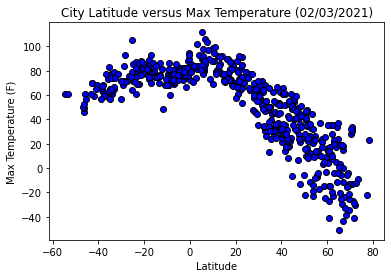

In [67]:
latitude = weather_final["Lat"]
temp = weather_final["Max Temp"]
plt.scatter(latitude, temp, marker="o", facecolors="blue", edgecolors="black",
            )
plt.title("City Latitude versus Max Temperature (02/03/2021)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

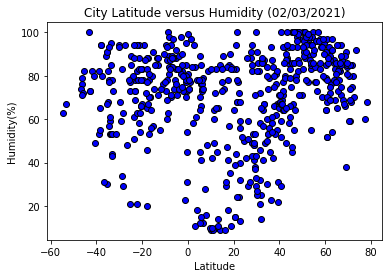

In [66]:
latitude = weather_final["Lat"]
humidity = weather_final["Humidity"]
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black",
            )
plt.title("City Latitude versus Humidity (02/03/2021)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

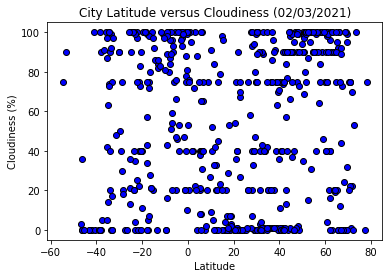

In [68]:
latitude = weather_final["Lat"]
cloudiness = weather_final["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black",
            )
plt.title("City Latitude versus Cloudiness (02/03/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

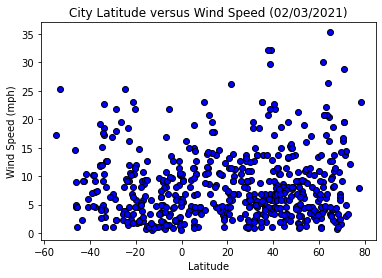

In [69]:
latitude = weather_final["Lat"]
wind = weather_final["Wind Speed"]
plt.scatter(latitude, wind, marker="o", facecolors="blue", edgecolors="black",
            )
plt.title("City Latitude versus Wind Speed (02/03/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [54]:
northern_hem=weather_final.loc[weather_final["Lat"]>=0.0]
southern_hem=weather_final.loc[weather_final["Lat"]<0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8763712703861579


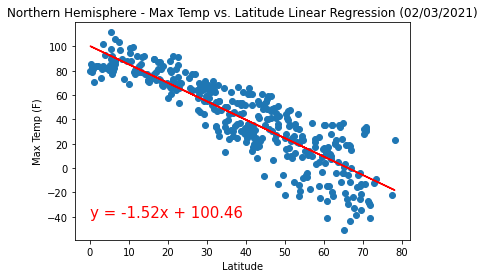

In [71]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.5386852978311982


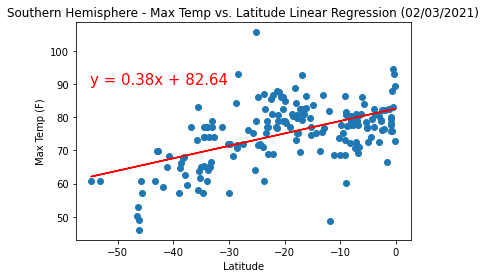

In [70]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.42895700116767776


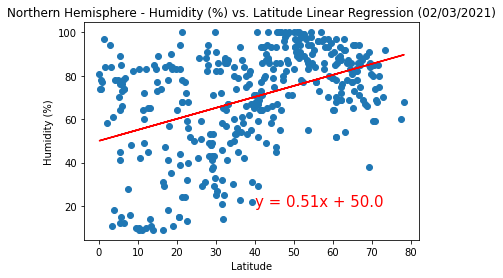

In [72]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.1773134002088629


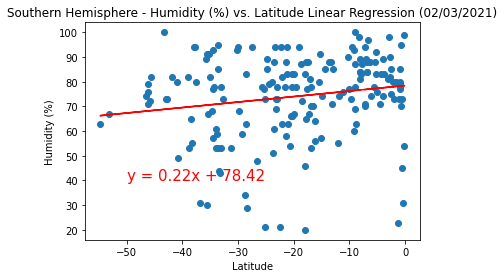

In [73]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.2926489246081114


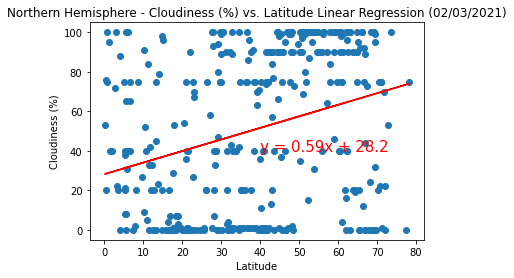

In [74]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.3595511050034274


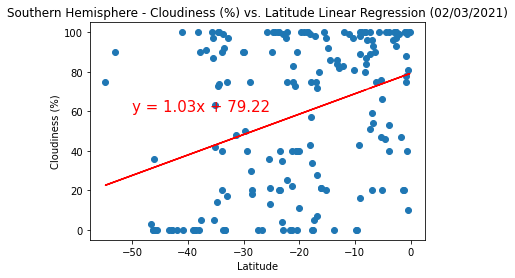

In [75]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.053837787881768844


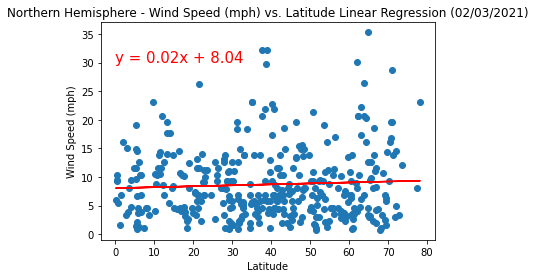

In [76]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/03/2021)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.26126760588369935


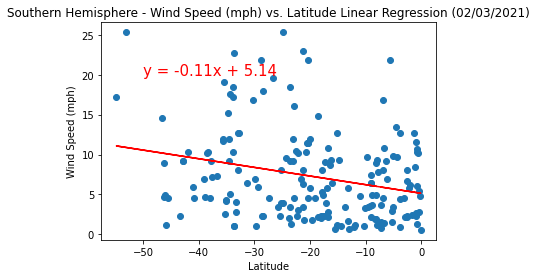

In [77]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/03/2021)")
plt.show()